# Analiza danych

In [23]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## Wstępna analiza i zmiana danych
### Pobieranie danych i pokazanie podstawowych informacji

In [3]:
# Pobieranie danych
path = kagglehub.dataset_download("rashadrmammadov/lung-cancer-prediction")
path += "\lung_cancer_data.csv"

# Sprawdzenie informacji o danych
df = pd.read_csv(path)
print(df.head())
df.shape

    Patient_ID  Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location  \
0  Patient0000   68    Male  Current Smoker      81.678677     Lower Lobe   
1  Patient0001   58    Male    Never Smoked      78.448272     Lower Lobe   
2  Patient0002   44    Male   Former Smoker      67.714305     Lower Lobe   
3  Patient0003   72    Male  Current Smoker      70.806008     Lower Lobe   
4  Patient0004   37  Female    Never Smoked      87.272433     Lower Lobe   

       Stage          Treatment  Survival_Months         Ethnicity  ...  \
0  Stage III            Surgery               44          Hispanic  ...   
1    Stage I  Radiation Therapy              101         Caucasian  ...   
2    Stage I       Chemotherapy               69  African American  ...   
3  Stage III       Chemotherapy               95  African American  ...   
4   Stage IV  Radiation Therapy              105             Asian  ...   

  Alanine_Aminotransferase_Level Aspartate_Aminotransferase_Level  \
0                

(23658, 38)

### Działanie na typie danych

In [5]:
# Zmiana typu wartości na właściwą
df['Performance_Status'] = df['Performance_Status'].astype('category')

# Znalezienie kolumn kategorialnych i liczbowych
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Kolumny numeryczne", numeric_columns)
print("\nKolumny kategoryczne", categorical_columns)

Kolumny numeryczne ['Age', 'Tumor_Size_mm', 'Survival_Months', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years']

Kolumny kategoryczne ['Patient_ID', 'Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other', 'Performance_Status']


## Wykresy kolumn
### Rozkład

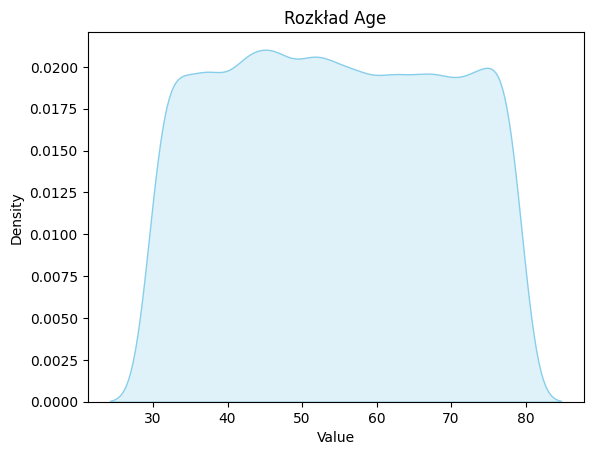

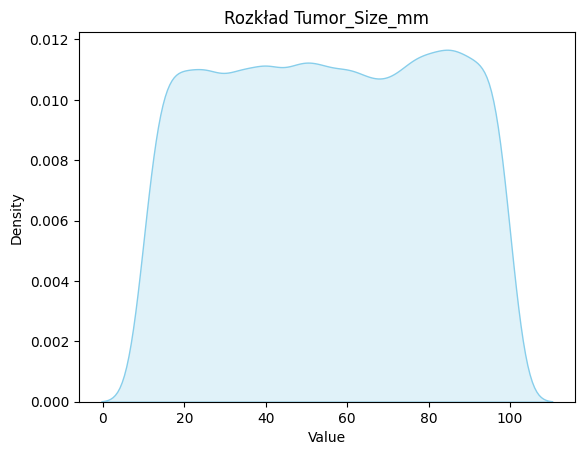

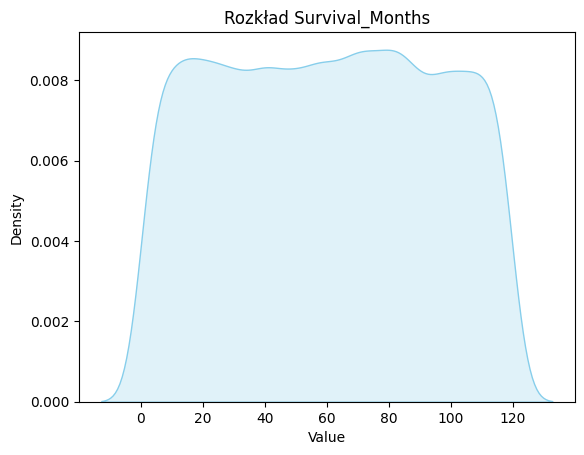

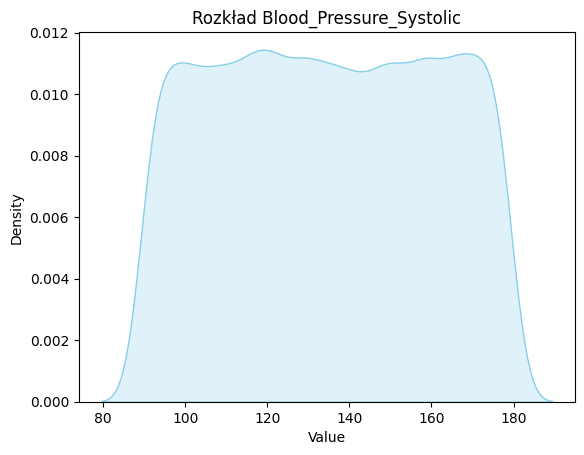

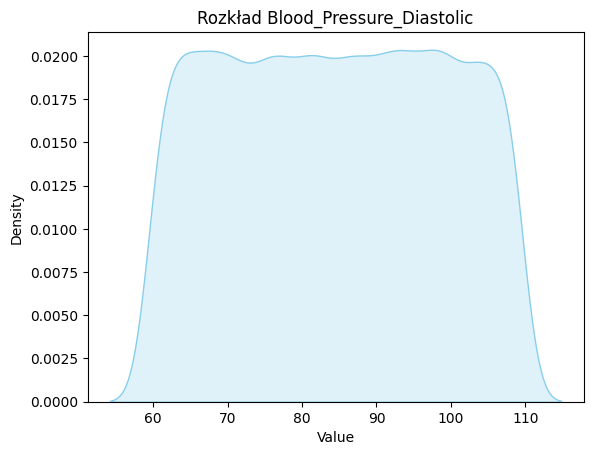

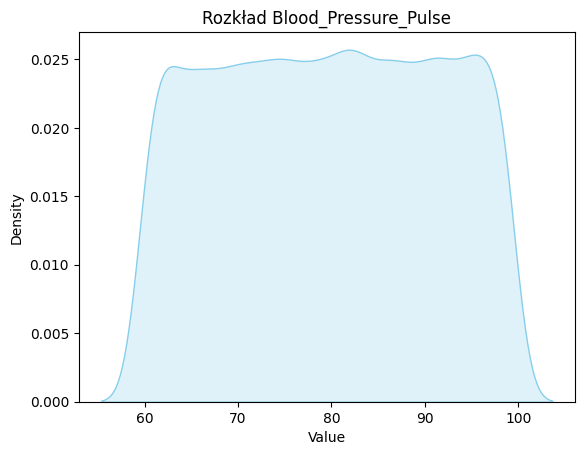

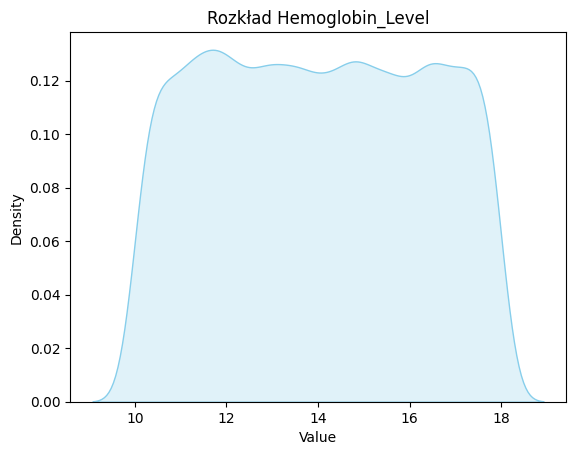

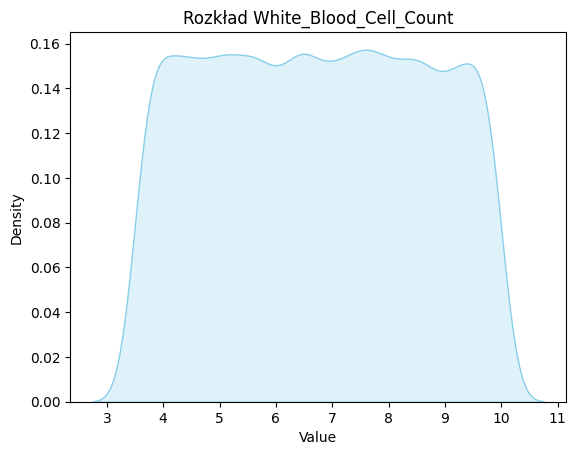

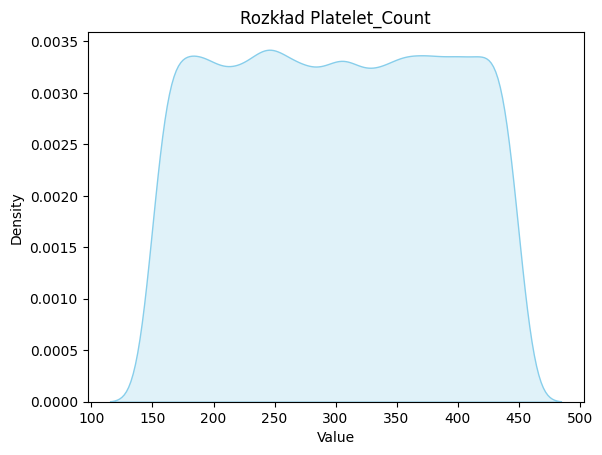

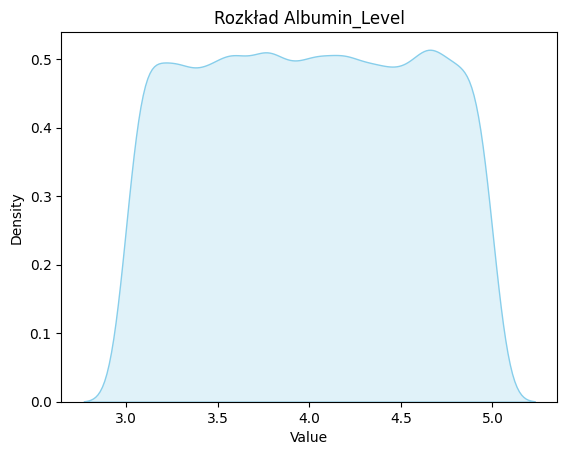

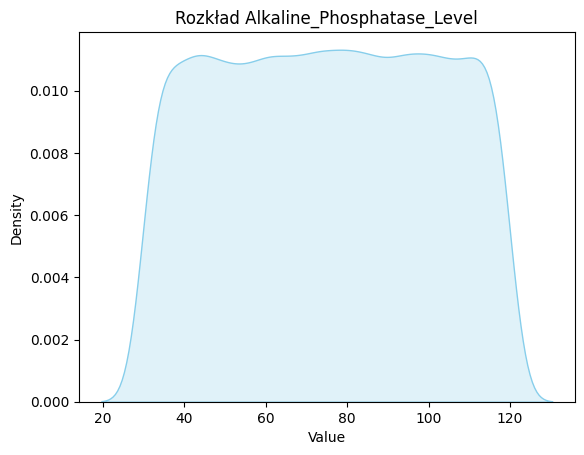

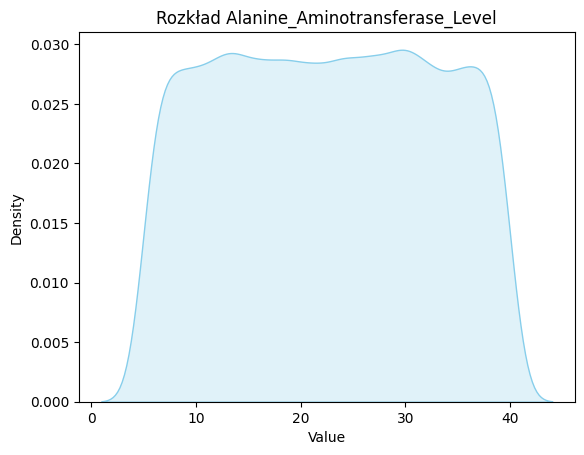

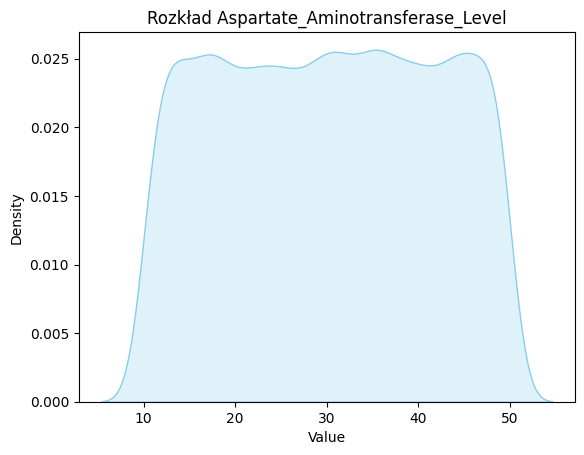

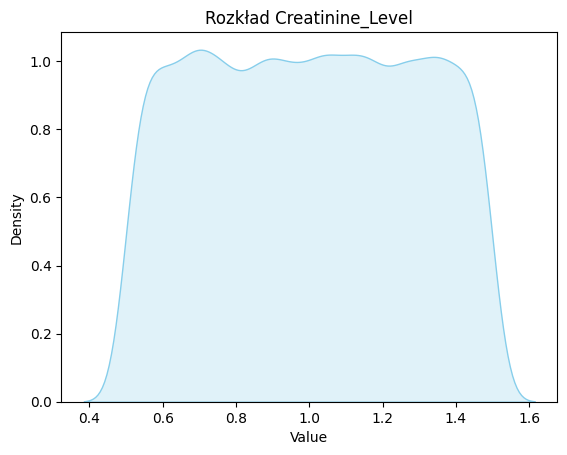

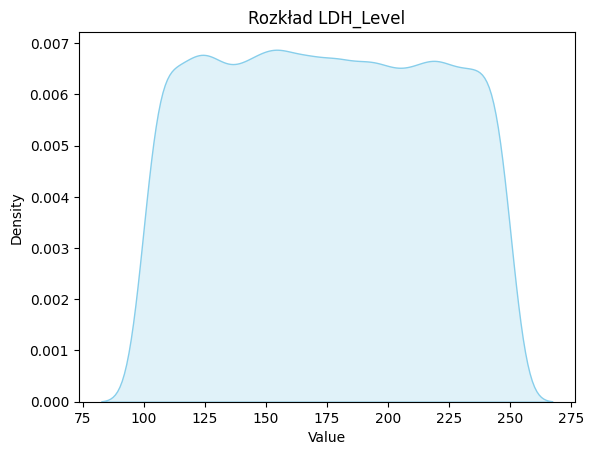

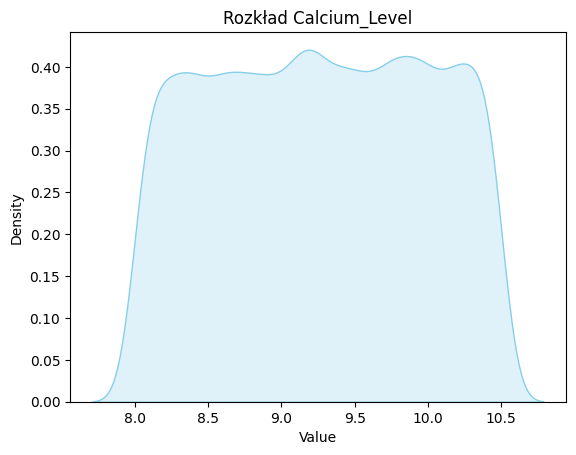

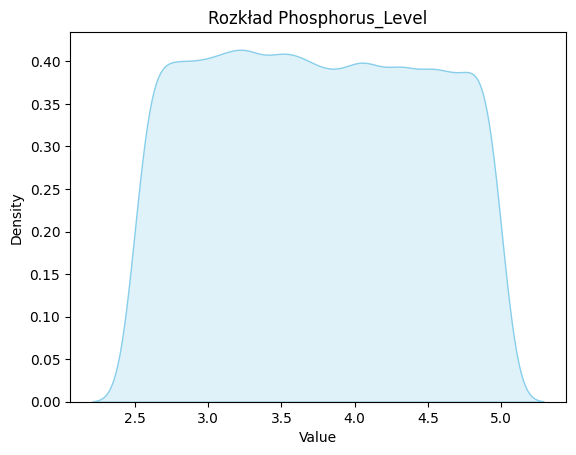

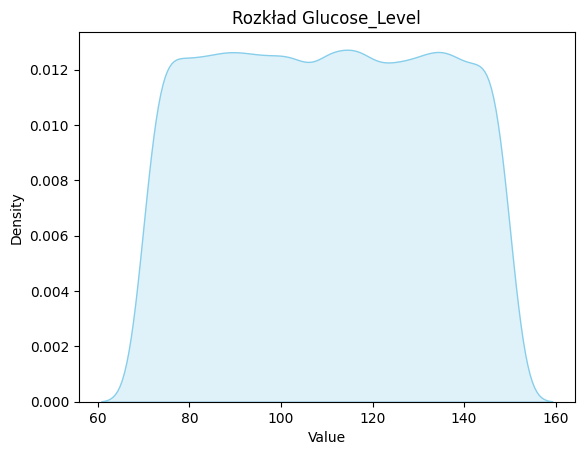

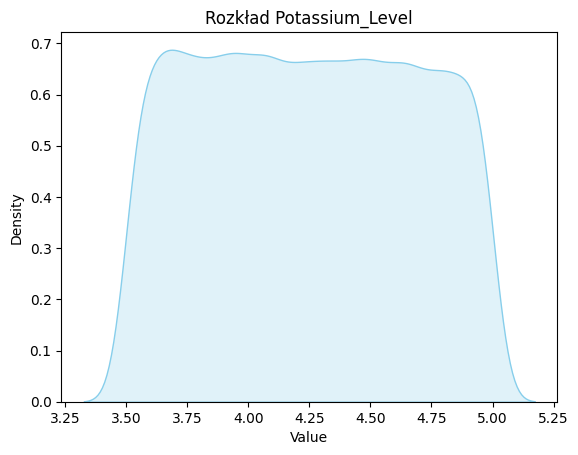

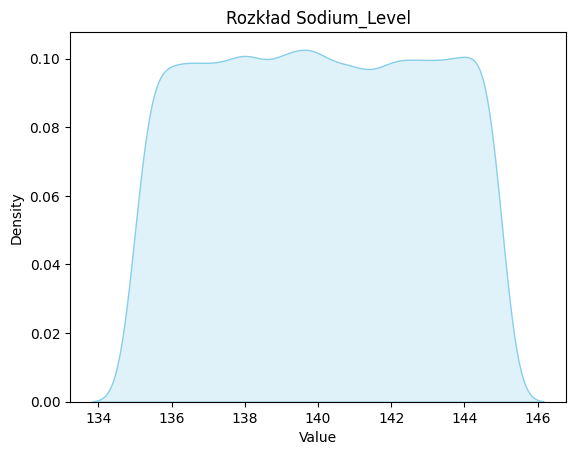

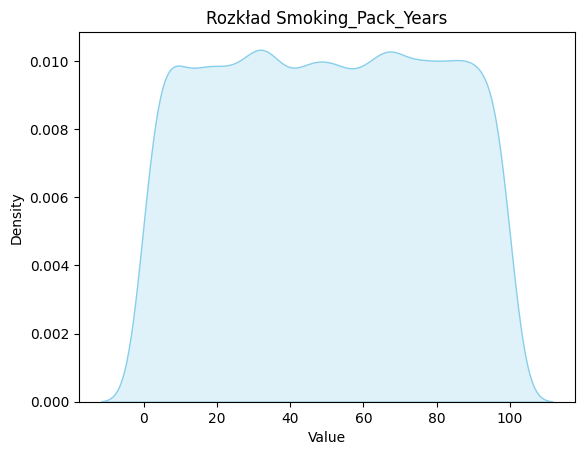

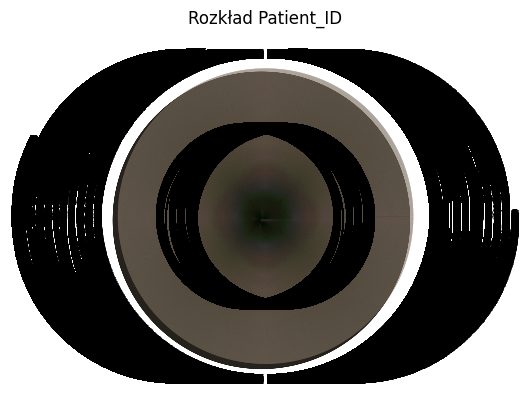

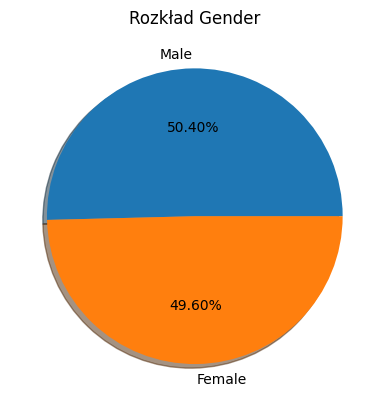

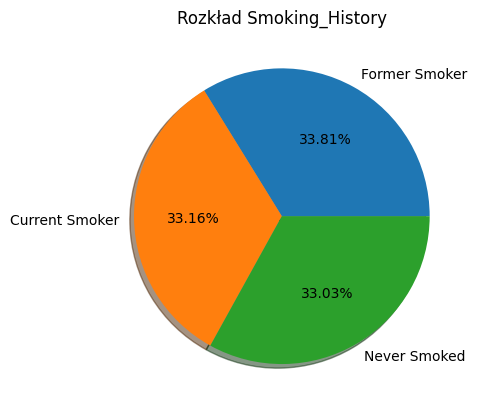

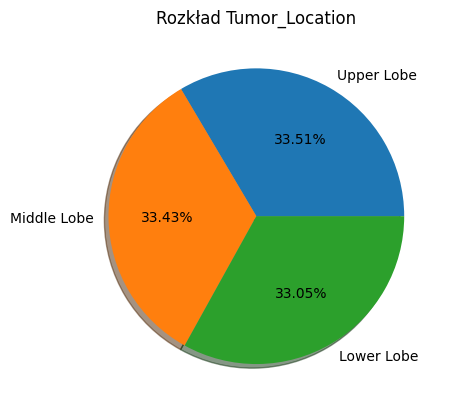

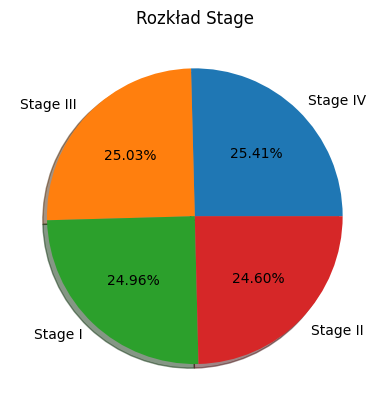

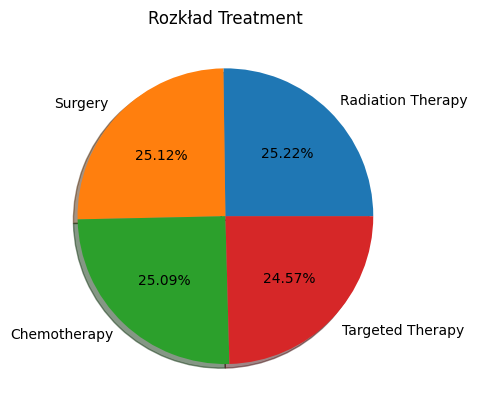

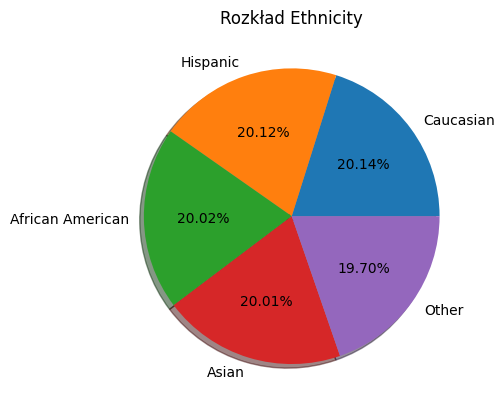

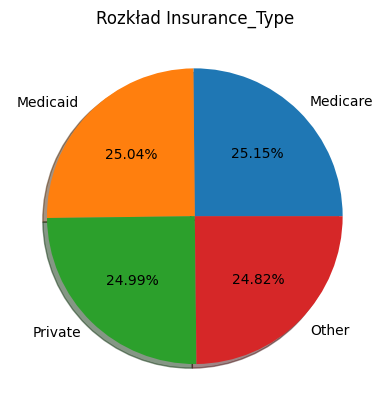

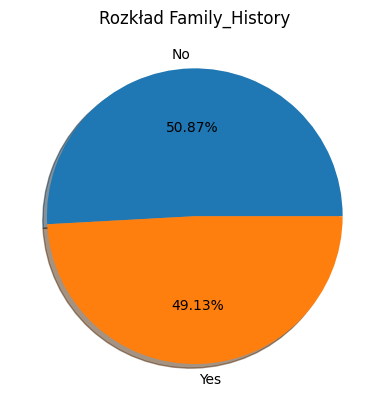

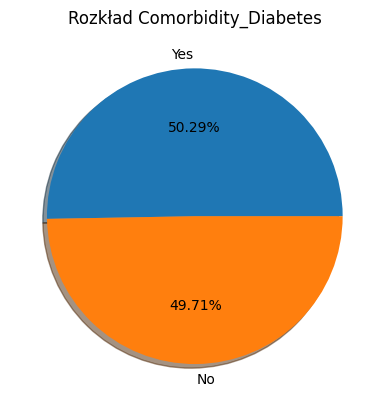

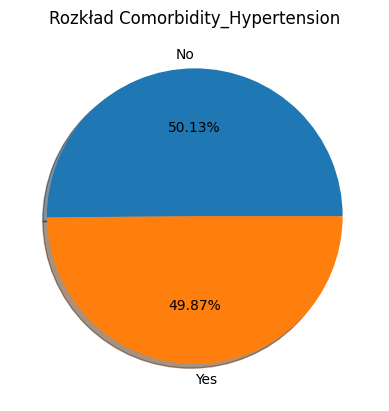

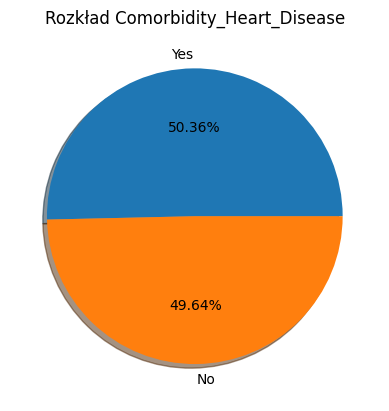

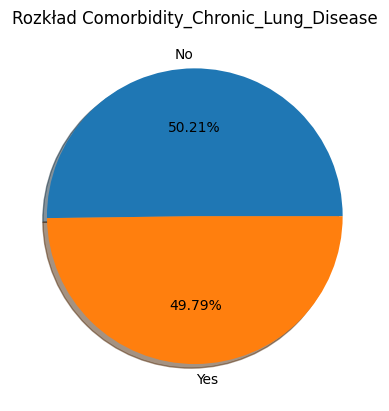

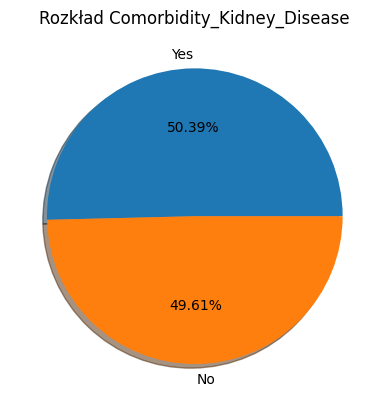

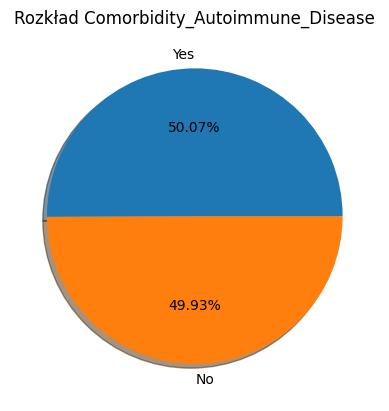

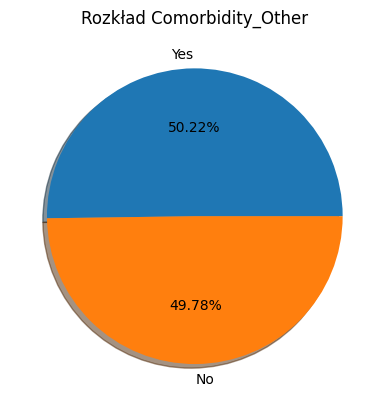

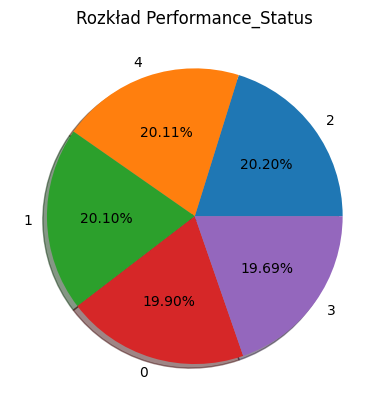

In [9]:
for column in numeric_columns:
    sns.kdeplot(df[column], fill=True, color='skyblue')
    title = "Rozkład " + column
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

for column in categorical_columns:
    if column != "Patient_ID":
        distribution = df[column].value_counts()
        plt.pie(distribution,
                autopct='%1.2f%%',
                labels=distribution.index,
                shadow=True)
        title = "Rozkład " + column
        plt.title(title)
        plt.show()

### Wykresy pudełkowe

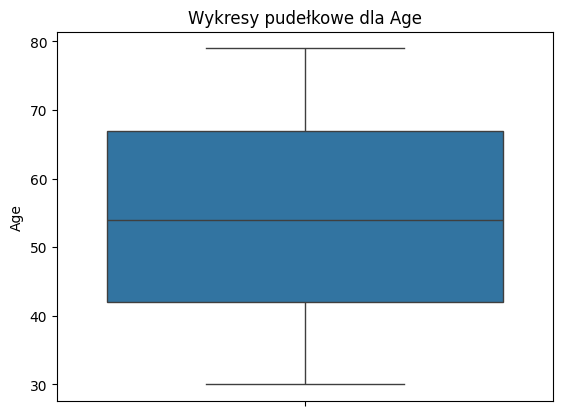

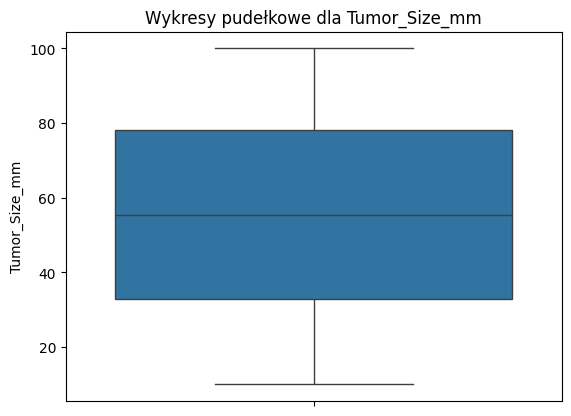

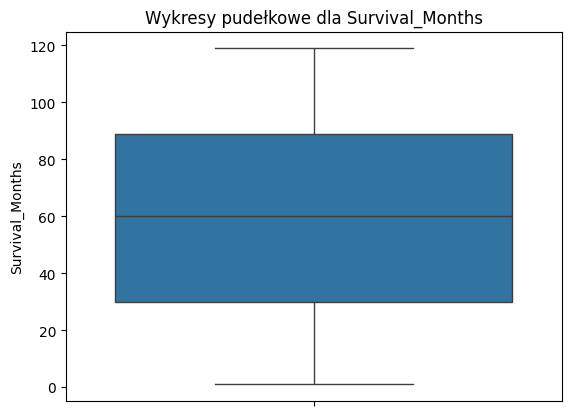

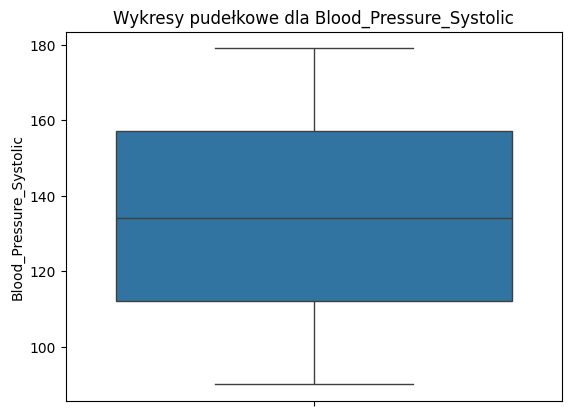

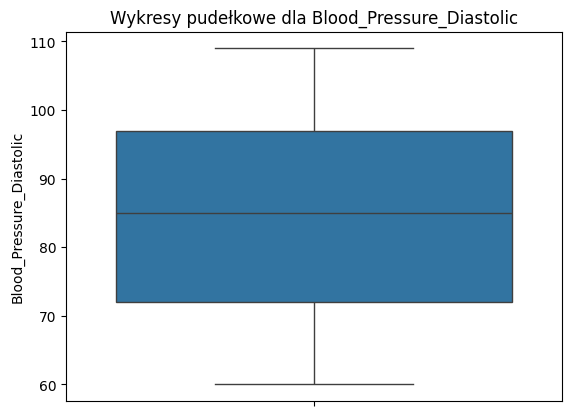

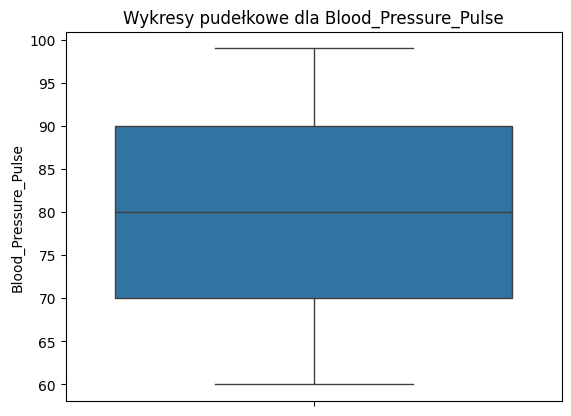

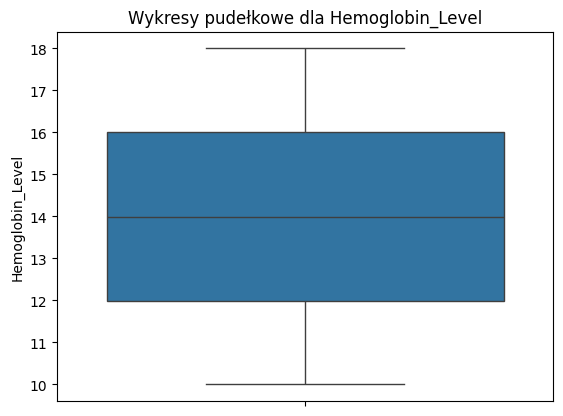

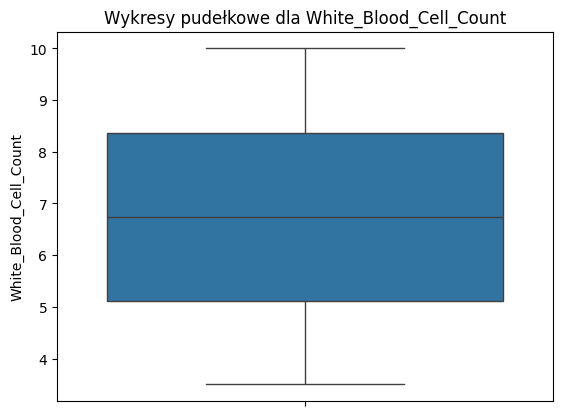

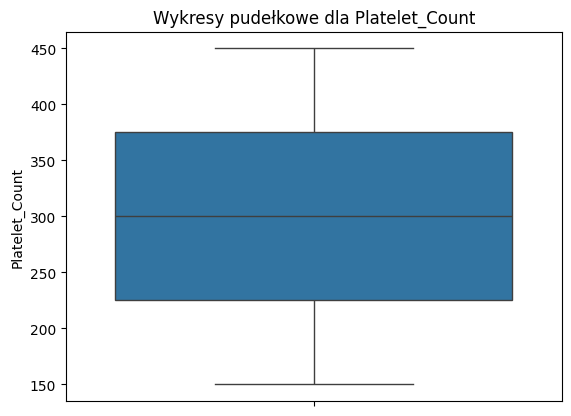

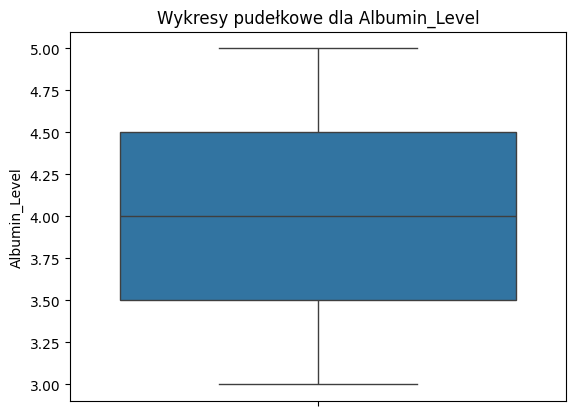

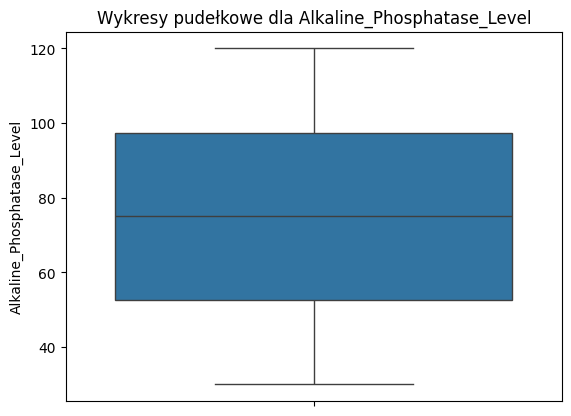

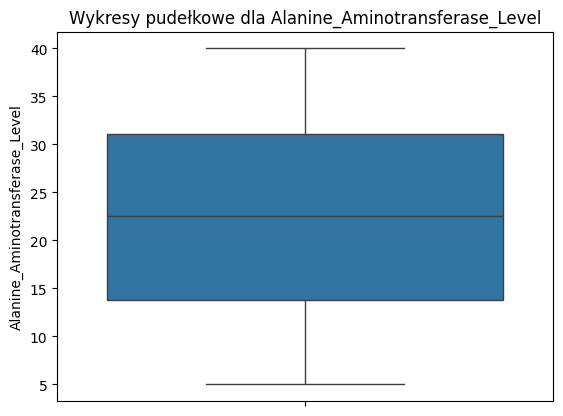

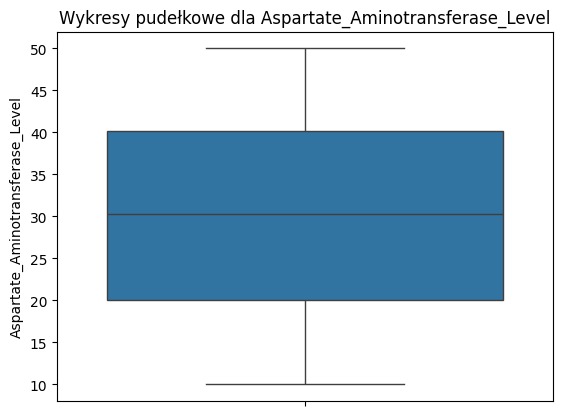

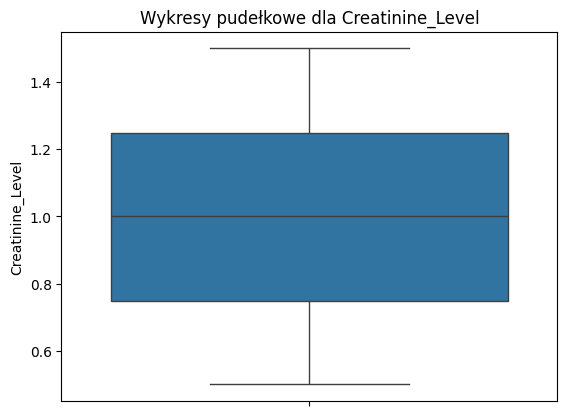

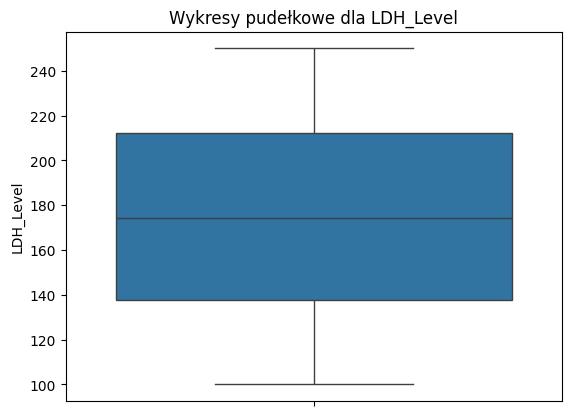

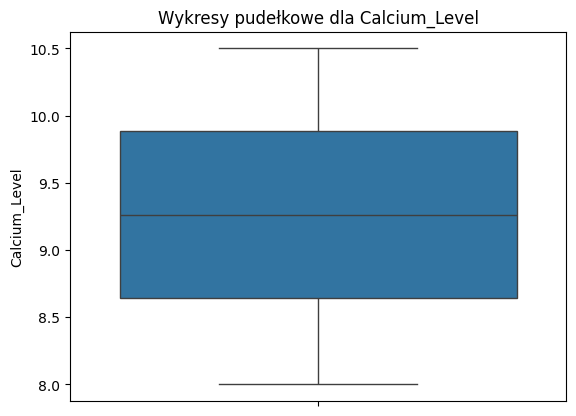

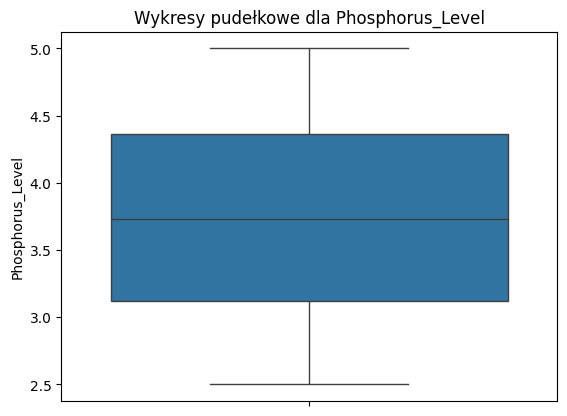

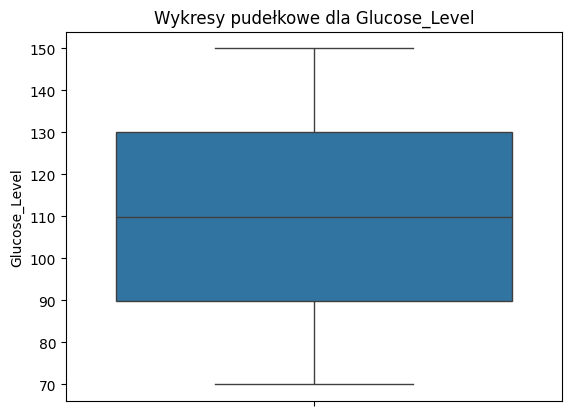

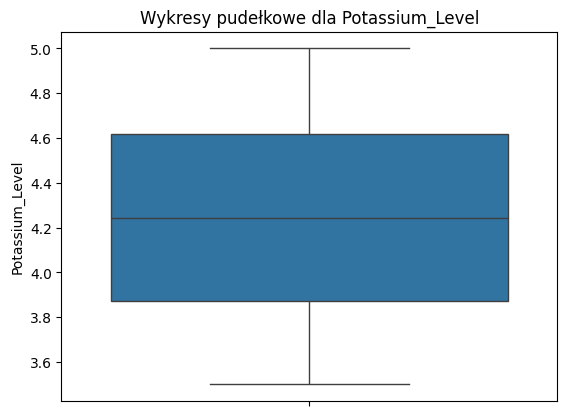

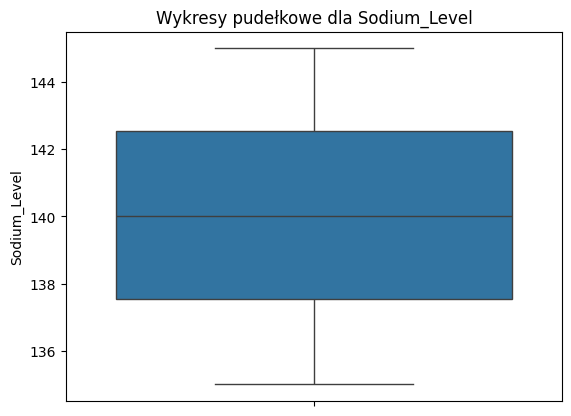

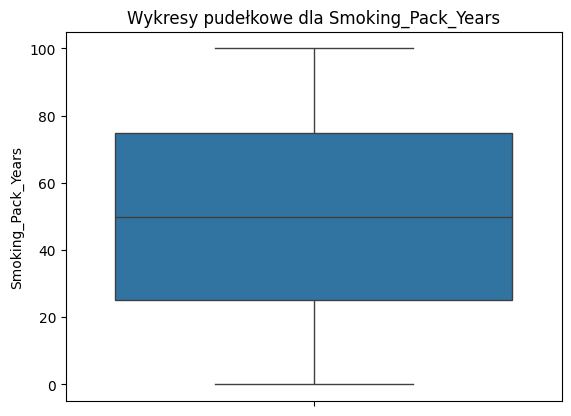

In [12]:
for column in numeric_columns:
    plt.figure()
    sns.boxplot(data=df[column])
    plt.xticks(rotation=90)
    title = "Wykresy pudełkowe dla " + column
    plt.title(title)
    plt.show()

### Macierz korelacji

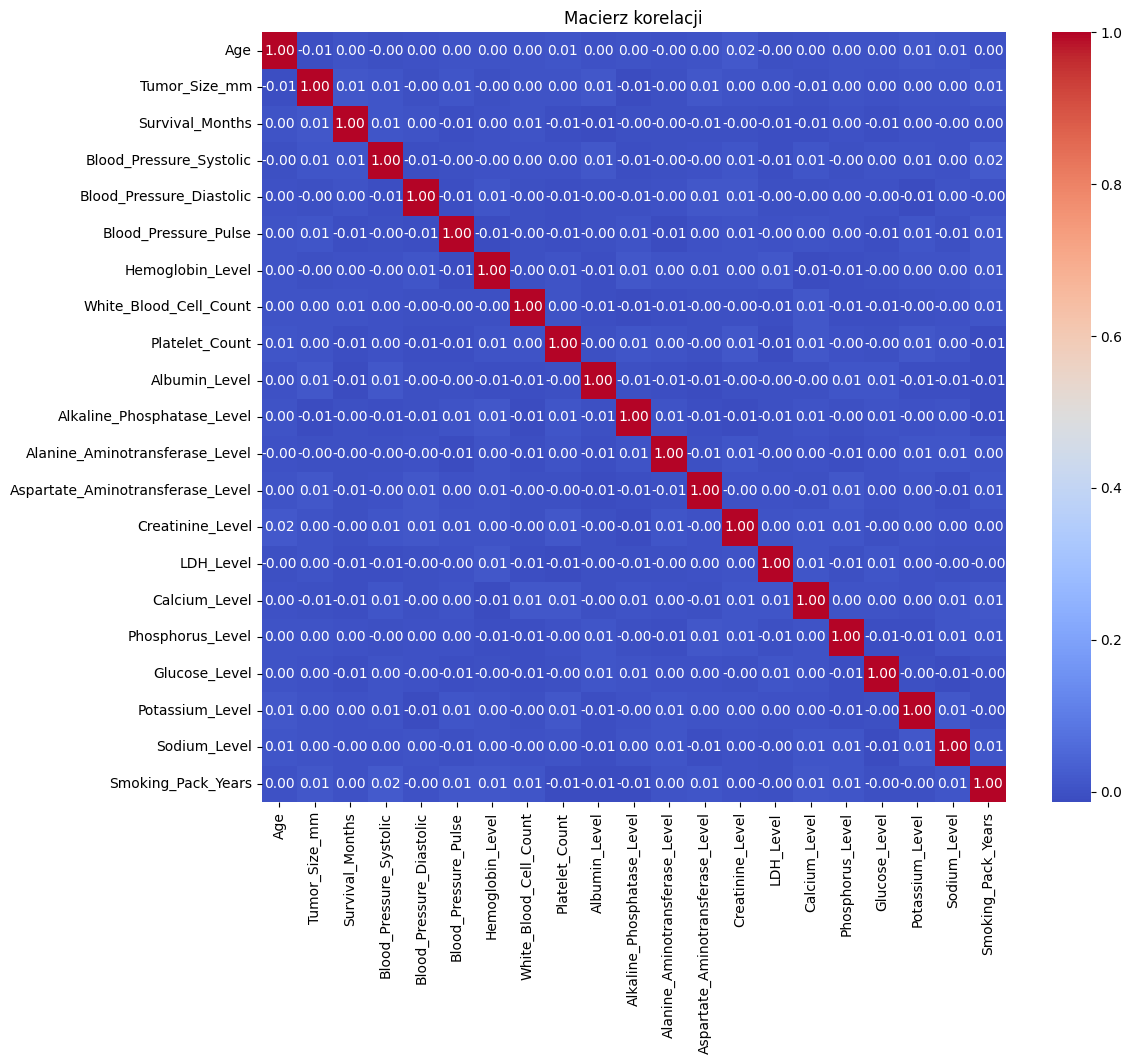

In [15]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

## Brakujące dane

In [24]:
print("Czy są jakieś brakujące dane?", df.isnull().values.any())
if df.isnull().values.any():
    print(df.isnull().sum())
    msno.matrix(df)
    plt.show()

Czy są jakieś brakujące dane? False


# Automatyczn analiza danych

In [28]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
AV.AutoViz(path)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (23658, 38)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  16
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  9
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Patient_ID,object,0.000000,100,,,Possible ID column: drop before modeling step.
Age,int64,0.000000,0,30.000000,79.000000,No issue
Gender,object,0.000000,0,,,No issue
Smoking_History,object,0.000000,0,,,No issue
Tumor_Size_mm,float64,0.000000,NA,10.004279,99.990554,No issue
Tumor_Location,object,0.000000,0,,,No issue
Stage,object,0.000000,0,,,No issue
Treatment,object,0.000000,0,,,No issue
Survival_Months,int64,0.000000,0,1.000000,119.000000,No issue
Ethnicity,object,0.000000,0,,,No issue


Number of All Scatter Plots = 136
All Plots done
Time to run AutoViz = 42 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,Albumin_Level,Alkaline_Phosphatase_Level,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,Medicare,No,Yes,Yes,Yes,No,Yes,Yes,Yes,3,161,99,92,13.538000,9.800707,321.735266,3.568383,49.310048,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,Private,Yes,Yes,Yes,No,No,Yes,Yes,No,4,101,91,93,16.800312,4.378428,251.581538,3.699357,111.421632,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,Other,Yes,No,No,No,Yes,Yes,No,No,0,109,74,81,14.473493,6.157792,393.456532,4.708385,76.648006,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,Medicare,Yes,Yes,No,Yes,No,Yes,Yes,No,1,103,85,68,17.442063,6.259383,275.177898,4.727672,81.952486,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,Medicaid,No,Yes,Yes,Yes,No,Yes,No,No,0,165,69,99,13.545171,5.203516,381.705572,4.605604,107.513423,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23653,Patient23653,45,Male,Former Smoker,91.279410,Middle Lobe,Stage I,Chemotherapy,16,Caucasian,Private,No,No,Yes,No,No,No,Yes,No,3,136,65,60,10.291070,5.424876,357.180896,3.939470,115.506310,21.218709,37.642878,1.469665,203.209056,9.011784,3.083901,121.588210,3.874261,138.004367,8.877173
23654,Patient23654,31,Male,Current Smoker,45.139048,Upper Lobe,Stage IV,Radiation Therapy,81,Asian,Other,No,Yes,Yes,No,No,Yes,No,Yes,4,157,102,83,14.017448,8.688169,448.588479,4.367993,67.912406,6.439687,45.747460,1.432533,245.095566,10.192073,4.571803,129.748104,4.635774,137.883562,33.573249
23655,Patient23655,74,Male,Former Smoker,89.640323,Upper Lobe,Stage IV,Chemotherapy,52,Asian,Private,Yes,Yes,Yes,Yes,No,Yes,Yes,No,0,122,96,74,16.195201,3.903498,341.790190,4.652690,113.252605,6.974531,20.982553,0.855960,214.793918,9.617543,4.877552,129.414306,3.730363,138.813953,26.893648
23656,Patient23656,47,Female,Former Smoker,45.770358,Middle Lobe,Stage I,Radiation Therapy,26,African American,Medicare,No,Yes,No,No,No,No,Yes,Yes,2,156,102,97,14.111498,9.096301,163.957566,3.663111,62.154204,21.817365,43.457246,0.824516,138.947588,8.239170,2.885529,127.647028,3.799932,139.706111,26.387602


Error in callback <function _draw_all_if_interactive at 0x000002710F63EDE0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 2000x84000 pixels is too large. It must be less than 2^16 in each direction.

In [32]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("sweetviz_report.html", open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

Error in callback <function _draw_all_if_interactive at 0x000002710F63EDE0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 2000x84000 pixels is too large. It must be less than 2^16 in each direction.